# **CHALLENGE 1**

Drink -> Beverages, coffee and tea,smoothies and shakes

Main Menu -> Breakfast, Beef & Pork, Chicken and Fish

Additional Menu -> Salads, Snacks & Sides, Dessert

In [1]:
#Download the library
import pandas as pd #import library to read data into dataframe
import numpy as np #import numpy library
import matplotlib.pyplot as plt
import seaborn as sns #for visualization tool
import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [2]:
df = pd.read_csv("menu.csv")

In [3]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


## Definisi Kolom

- 


## Analisa Deskriptif

In [4]:
df.shape

(260, 24)

Dataset menu ini terdiri dari 260 baris dan 24 kolom

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

Tipe data pada setiap fitur sudah sesuai sehingga tidak perlu dilakukan handling terhadap tipe data

In [6]:
df.Category.unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Calories,260.0,368.269231,240.269886,0.0,210.000,340.0,500.00,1880.0
Calories from Fat,260.0,127.096154,127.875914,0.0,20.000,100.0,200.00,1060.0
Total Fat,260.0,14.165385,14.205998,0.0,2.375,11.0,22.25,118.0
Total Fat (% Daily Value),260.0,21.815385,21.885199,0.0,3.750,17.0,35.00,182.0
Saturated Fat,260.0,6.007692,5.321873,0.0,1.000,5.0,10.00,20.0
Saturated Fat (% Daily Value),260.0,29.965385,26.639209,0.0,4.750,24.0,48.00,102.0
Trans Fat,260.0,0.203846,0.429133,0.0,0.000,0.0,0.00,2.5
Cholesterol,260.0,54.942308,87.269257,0.0,5.000,35.0,65.00,575.0
Cholesterol (% Daily Value),260.0,18.392308,29.091653,0.0,2.000,11.0,21.25,192.0
Sodium,260.0,495.750000,577.026323,0.0,107.500,190.0,865.00,3600.0


## Data Preparation

In [8]:
df.isna().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

Tidak terdapat missing value sehingga tidak perlu melakukan handling

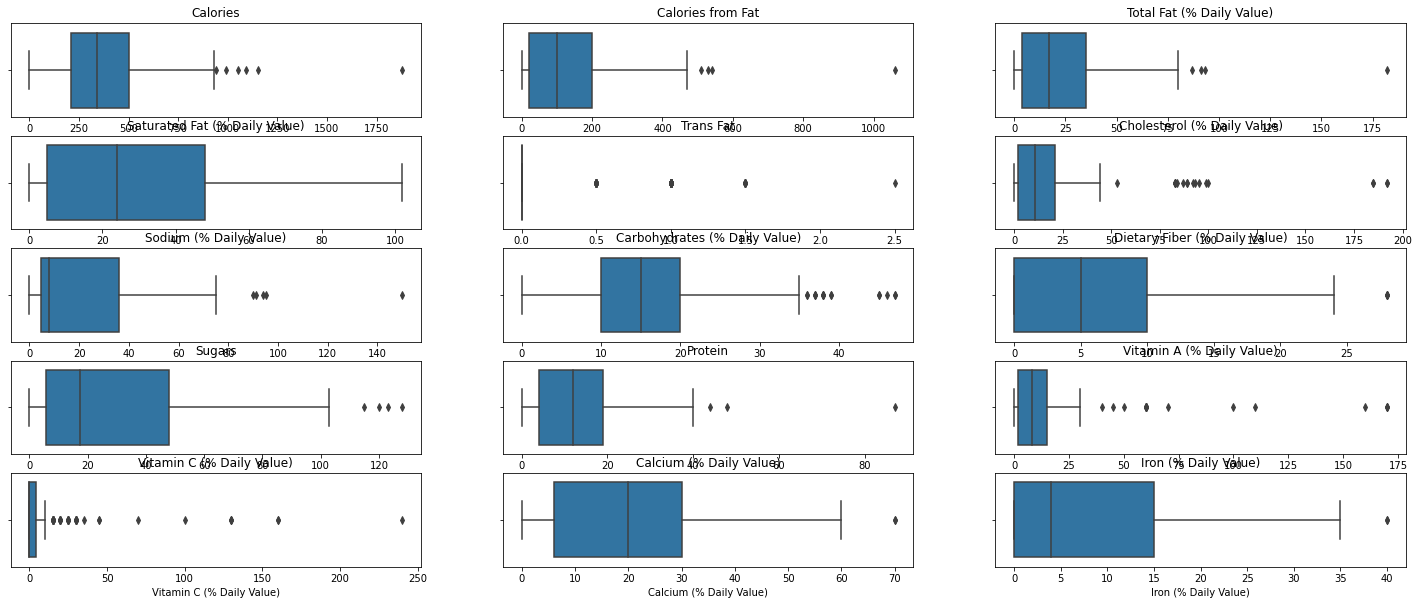

In [9]:
#Outliers
columns = ['Calories', 'Calories from Fat', 'Total Fat (% Daily Value)', 'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol (% Daily Value)', 'Sodium (% Daily Value)', 'Carbohydrates (% Daily Value)', 'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']
plt.figure(figsize = (25, 10))
x = 1
for i in columns:
    ax = plt.subplot(5, 3, x)
    sns.boxplot(df[i], orient = 'v')
    ax.set_title(i)
    x += 1

Terdapat banyak outlier pada kolom - kolom diatas, namun tidak dilakukan handling karena data outliers tersebut merupakan menu combo atau dapat dinikmati oleh beberapa orang

In [10]:
df.loc[df['Item'] == 'Chicken McNuggets (40 piece)']

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
82,Chicken & Fish,Chicken McNuggets (40 piece),22.8 oz (646 g),1880,1060,118.0,182,20.0,101,1.0,265,89,3600,150,118,39,6,24,1,87,0,15,8,25


In [11]:
df.drop(df.loc[df['Item'] == 'Chicken McNuggets (40 piece)'].index, inplace=True)

In [12]:
df.shape

(259, 24)

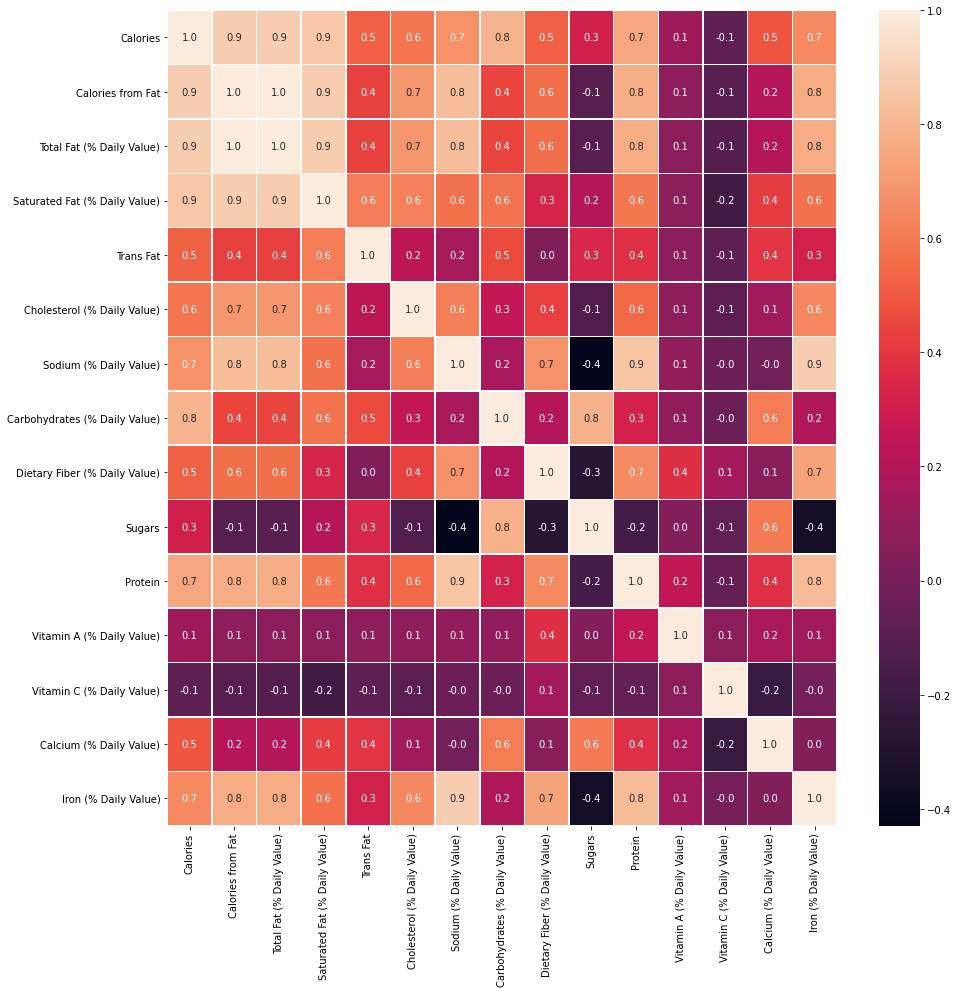

In [13]:
df_cor = df[['Calories', 'Calories from Fat', 'Total Fat (% Daily Value)', 'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol (% Daily Value)', 'Sodium (% Daily Value)', 'Carbohydrates (% Daily Value)', 'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']]
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_cor.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

## Analisis dan Visualisasi Data

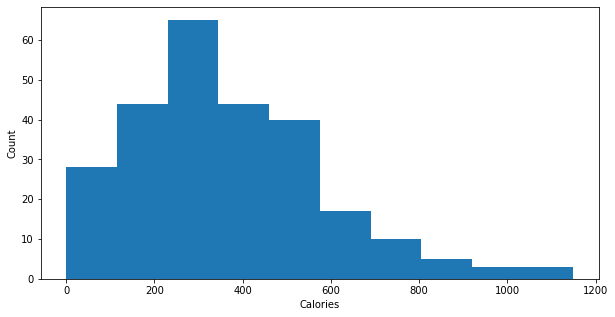

In [14]:
plt.figure(figsize = (10, 5))
df['Calories'].plot(kind = 'hist')
plt.xlabel('Calories')
plt.ylabel('Count')
plt.show()

In [15]:
gr_menu = df[['Category', 'Calories']].groupby(by = 'Category', axis = 0, as_index = True).mean()
gr_menu.columns = ['Mean']
gr_menu['Proportion'] = gr_menu['Mean']/gr_menu['Mean'].sum()
gr_menu

,Mean,Proportion
Category,,
Beef & Pork,494.000000,0.154882
Beverages,113.703704,0.035649
Breakfast,526.666667,0.165124
Chicken & Fish,501.923077,0.157366
Coffee & Tea,283.894737,0.089008
Desserts,222.142857,0.069648
Salads,270.000000,0.084652
Smoothies & Shakes,531.428571,0.166617
Snacks & Sides,245.769231,0.077055


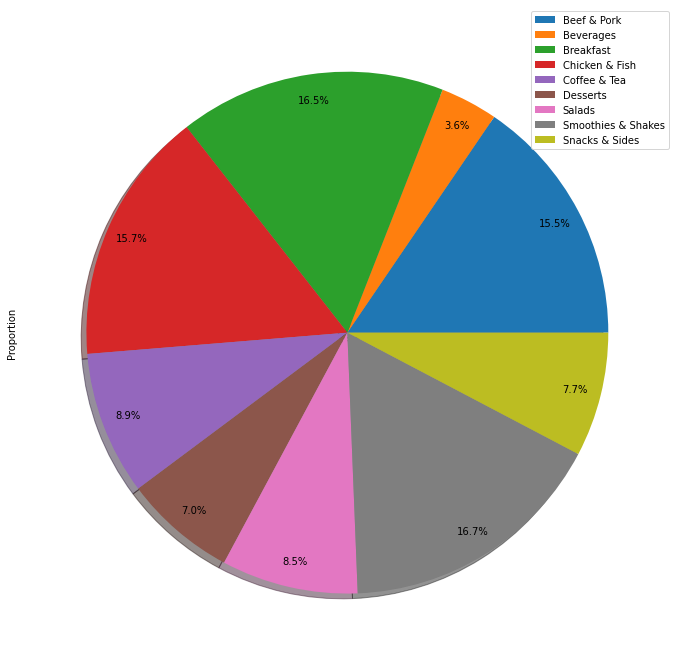

In [16]:
plt.figure(figsize = (15,12))
gr_menu['Proportion'].plot(kind = 'pie',
                           subplots   = True,
                           autopct    = '%1.1f%%',
                           shadow     = True,
                           labels     = None,
                           pctdistance= 0.9)
plt.legend(labels = gr_menu.index,
           loc = 'best')
plt.show()

## Modelling

In [17]:
df['avg_daily_value'] = (df['Total Fat (% Daily Value)'] + df['Saturated Fat (% Daily Value)'] + df['Cholesterol (% Daily Value)'] + df['Sodium (% Daily Value)'] + df['Carbohydrates (% Daily Value)'] + df['Dietary Fiber (% Daily Value)'] + df['Vitamin A (% Daily Value)'] + df['Vitamin C (% Daily Value)'] + df['Calcium (% Daily Value)'] + df['Iron (% Daily Value)'])/10
df

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),avg_daily_value
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15,24.0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8,13.3
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10,19.5
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15,31.3
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,45,14,280,12,80,27,1,4,64,12,15,0,40,8,19.0
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,55,19,380,16,106,35,1,5,85,15,20,0,50,10,24.8
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,30,9,190,8,53,18,1,2,43,8,10,0,25,6,12.4
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,60,20,400,17,114,38,2,9,103,21,20,0,60,6,29.6


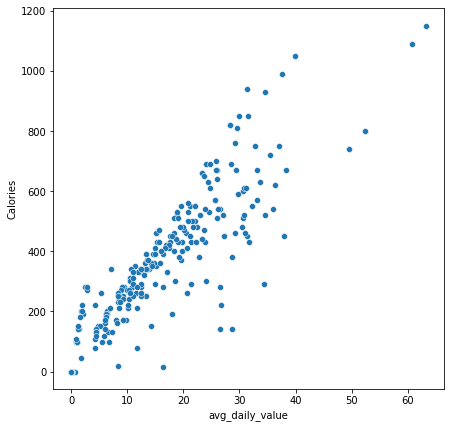

In [18]:
plt.figure(figsize=(7,7))
sns.scatterplot(x = df['avg_daily_value'], y=df['Calories'])

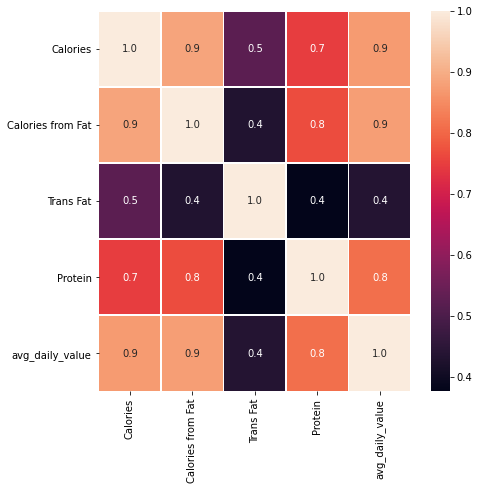

In [19]:
df_cor = df[['Calories', 'Calories from Fat', 'Trans Fat', 'Protein', 'avg_daily_value']]
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(df_cor.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [20]:
from sklearn.cluster import KMeans

In [21]:
#scaling
from sklearn.preprocessing import MinMaxScaler

In [22]:
x = df[['Calories','Calories from Fat', 'Trans Fat', 'Protein', 'avg_daily_value']].values

In [23]:
scaled = MinMaxScaler()
x_scaled = scaled.fit_transform(x)

In [24]:
k_means = KMeans(init = "k-means++", n_clusters = 2, n_init = 5000)

In [25]:
k_means.fit_predict(x_scaled)

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int32)

In [26]:
df['cluster'] = k_means.fit_predict(x_scaled)

In [27]:
df.drop(['Total Fat', 'Saturated Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 'Dietary Fiber', 'Sugars'], axis=1, inplace=True)

In [28]:
df.drop('Serving Size', axis = 1, inplace = True)

In [29]:
df.drop(['Total Fat (% Daily Value)', 'Saturated Fat (% Daily Value)', 'Cholesterol (% Daily Value)', 'Sodium (% Daily Value)', 'Carbohydrates (% Daily Value)', 'Dietary Fiber (% Daily Value)', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)'], axis = 1 , inplace = True)

In [30]:
df

,Category,Item,Calories,Calories from Fat,Trans Fat,Protein,avg_daily_value,cluster
0,Breakfast,Egg McMuffin,300,120,0.0,17,24.0,1
1,Breakfast,Egg White Delight,250,70,0.0,18,13.3,1
2,Breakfast,Sausage McMuffin,370,200,0.0,14,19.5,0
3,Breakfast,Sausage McMuffin with Egg,450,250,0.0,21,31.3,0
4,Breakfast,Sausage McMuffin with Egg Whites,400,210,0.0,21,19.8,0
...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),510,150,0.5,12,19.0,0
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),690,200,1.0,15,24.8,0
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),340,100,0.0,8,12.4,1
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),810,290,1.0,21,29.6,0


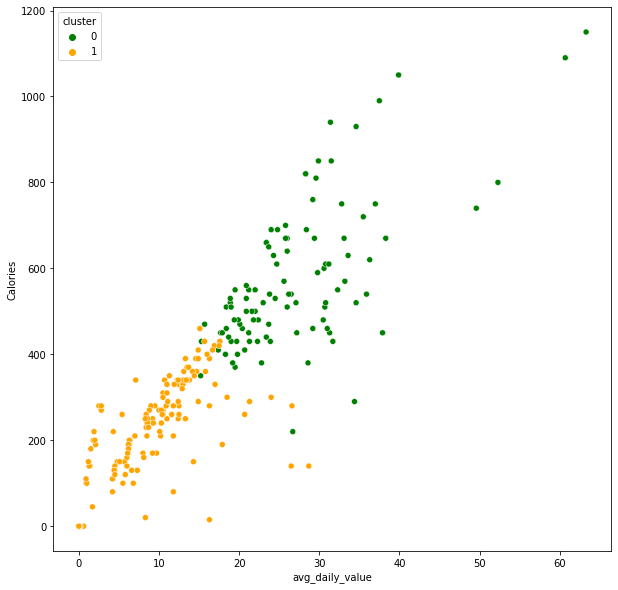

In [31]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = df['avg_daily_value'], y=df['Calories'], hue = df['cluster'], palette=['green','orange'])

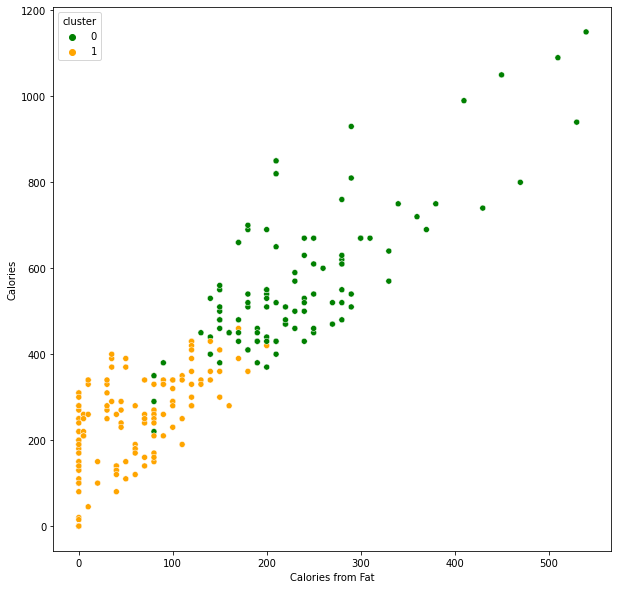

In [32]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = df['Calories from Fat'], y=df['Calories'], hue = df['cluster'], palette=['green','orange'])

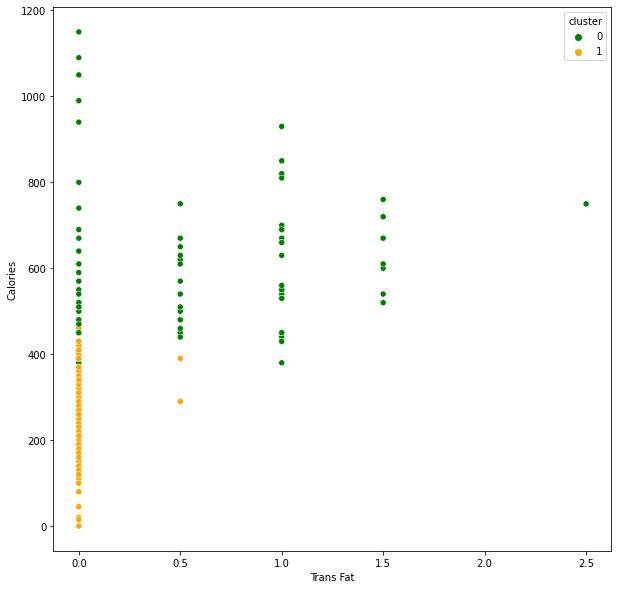

In [33]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = df['Trans Fat'], y=df['Calories'], hue = df['cluster'], palette=['green','orange'])

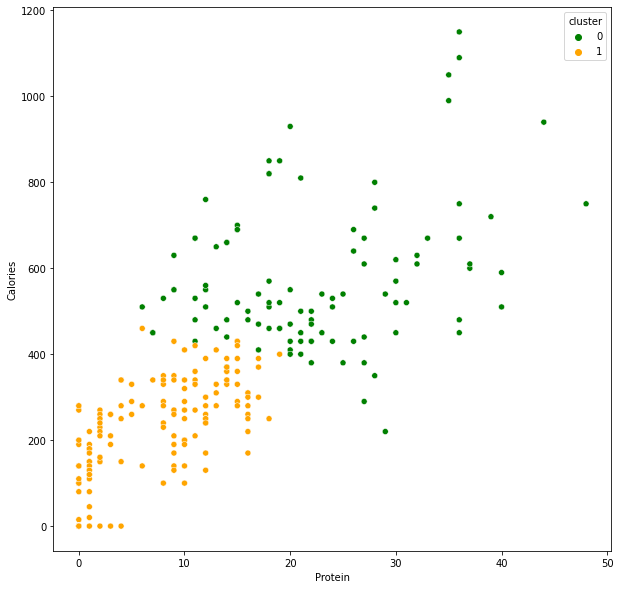

In [34]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = df['Protein'], y=df['Calories'], hue = df['cluster'], palette=['green','orange'])

In [35]:
df[df['cluster'] == 0].min()

Category                               Beef & Pork
Item                 Bacon Buffalo Ranch McChicken
Calories                                       220
Calories from Fat                               80
Trans Fat                                        0
Protein                                          6
avg_daily_value                               15.2
cluster                                          0
dtype: object

In [36]:
df[df['cluster'] == 0].max()

Category                    Snacks & Sides
Item                 Vanilla Shake (Small)
Calories                              1150
Calories from Fat                      540
Trans Fat                              2.5
Protein                                 48
avg_daily_value                       63.3
cluster                                  0
dtype: object

In [37]:
df[df['cluster'] == 1].min()

Category                     Beef & Pork
Item                 1% Low Fat Milk Jug
Calories                               0
Calories from Fat                      0
Trans Fat                              0
Protein                                0
avg_daily_value                        0
cluster                                1
dtype: object

In [38]:
df[df['cluster'] == 1].max()

Category                Snacks & Sides
Item                 Sweet Tea (Small)
Calories                           460
Calories from Fat                  200
Trans Fat                          0.5
Protein                             19
avg_daily_value                   28.7
cluster                              1
dtype: object

In [39]:
df_cl0 = df[df['cluster'] == 0]
df_cl0[df_cl0['Category'] == "Beef & Pork"]

,Category,Item,Calories,Calories from Fat,Trans Fat,Protein,avg_daily_value,cluster
42,Beef & Pork,Big Mac,530,240,1.0,24,24.5,0
43,Beef & Pork,Quarter Pounder with Cheese,520,240,1.5,30,27.1,0
44,Beef & Pork,Quarter Pounder with Bacon & Cheese,600,260,1.5,37,30.6,0
45,Beef & Pork,Quarter Pounder with Bacon Habanero Ranch,610,280,1.5,37,30.8,0
46,Beef & Pork,Quarter Pounder Deluxe,540,250,1.5,29,26.5,0
47,Beef & Pork,Double Quarter Pounder with Cheese,750,380,2.5,48,37.0,0
50,Beef & Pork,Double Cheeseburger,430,190,1.0,24,23.9,0
51,Beef & Pork,Bacon Clubhouse Burger,720,360,1.5,39,35.5,0
52,Beef & Pork,McDouble,380,150,1.0,22,19.2,0
53,Beef & Pork,Bacon McDouble,440,200,1.0,27,23.4,0


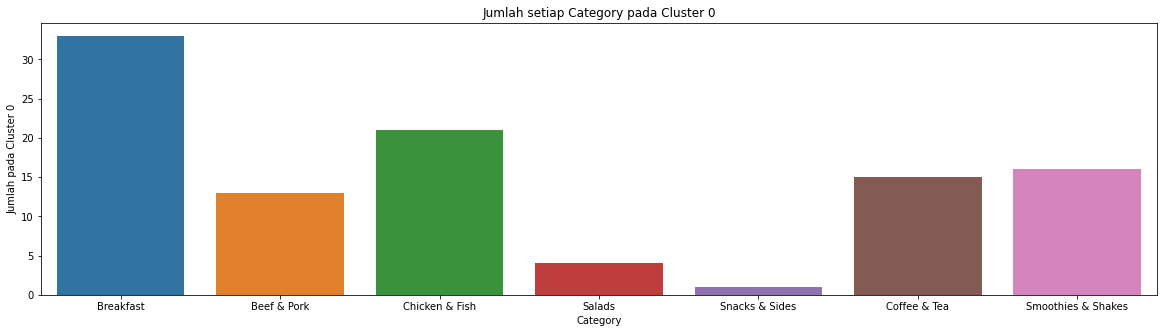

In [40]:
plt.figure(figsize=(20,5))
fig = sns.countplot(x = df_cl0['Category'])
fig.set(xlabel='Category', ylabel='Jumlah pada Cluster 0')
fig.set_title("Jumlah setiap Category pada Cluster 0")
plt.show()

In [41]:
df_cl1 = df[df['cluster'] == 1]
df_cl1[df_cl1['Category'] == "Coffee & Tea"].head(20)

,Category,Item,Calories,Calories from Fat,Trans Fat,Protein,avg_daily_value,cluster
137,Coffee & Tea,Iced Tea (Small),0,0,0.0,0,0.0,1
138,Coffee & Tea,Iced Tea (Medium),0,0,0.0,0,0.0,1
139,Coffee & Tea,Iced Tea (Large),0,0,0.0,0,0.1,1
140,Coffee & Tea,Iced Tea (Child),0,0,0.0,0,0.0,1
141,Coffee & Tea,Sweet Tea (Small),150,0,0.0,1,1.2,1
142,Coffee & Tea,Sweet Tea (Medium),180,0,0.0,1,1.5,1
143,Coffee & Tea,Sweet Tea (Large),220,0,0.0,1,1.9,1
144,Coffee & Tea,Sweet Tea (Child),110,0,0.0,0,0.9,1
145,Coffee & Tea,Coffee (Small),0,0,0.0,0,0.0,1
146,Coffee & Tea,Coffee (Medium),0,0,0.0,0,0.0,1


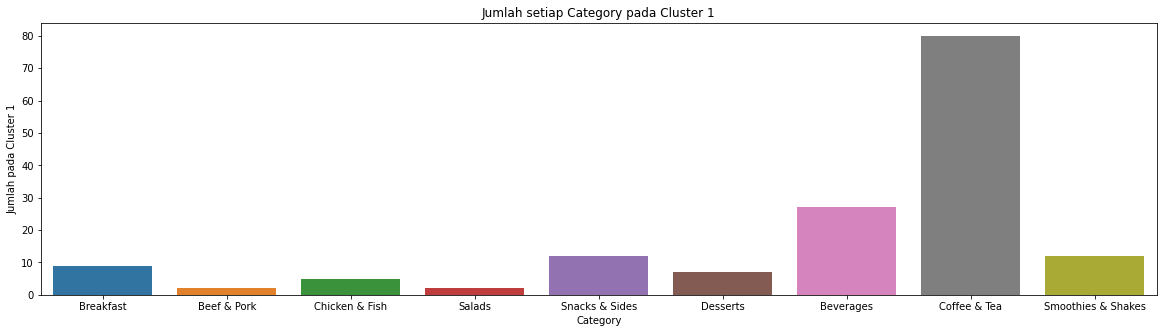

In [42]:
plt.figure(figsize=(20,5))
fig = sns.countplot(x = df_cl1['Category'])
fig.set(xlabel='Category', ylabel='Jumlah pada Cluster 1')
fig.set_title("Jumlah setiap Category pada Cluster 1")
plt.show()

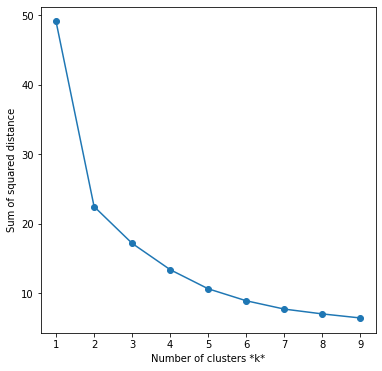

In [43]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(init = "k-means++", n_clusters = k, n_init = 5000)
    km.fit(x_scaled)
    km.predict(x_scaled)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');
